# Data diri
Nama: Angga Dwi Sunarto

email: anggadwisunarto3@gmail.com

domisili kota: Kabupaten Semarang, Jawa tengah

# Import library yang diperlukan

In [1]:
!pip install mediapipe

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.2 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 821.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/904.2 kB ? eta -:--:--
     -------- ----------------------------- 204.8/904.2 kB 4.1 MB/s eta 0:00:01
     --------------- ---------------------- 368.6/904.2 kB 3.8 MB/s eta 0:00:01
     ------------------------------- ------ 757.8/904.2 kB 4.8 MB/s eta 0:00:01
     -------------------------------------  901.1/904.2 kB 4.4 MB/s eta 0:00:01
     -------------------------------------- 904.2/904.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/199.7 kB ? eta -:--:--
     -------------------------------------- 199.7/199.7 kB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/118.7 kB ? eta -:--:--
     -------------------------------------- 118.7/118.7 kB 3.5 MB/s e

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import mediapipe as mp
import cv2

# Proyek Akhir : Klasifikasi Gambar
> Selamat, Anda telah berada di akhir pembelajaran dalam akademi ini. Anda sudah mempelajari dasar-dasar machine learning dan bagaimana jaringan saraf bekerja. Untuk bisa lulus dari akademi ini, Anda harus mengirimkan submission berupa program jaringan saraf tiruan menggunakan TensorFlow. Program Anda harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.
>> **Berikut kriteria submission yang harus dipenuhi:**
1. Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau
 gunakan link ini pada wget command: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.
2. Dataset harus dibagi menjadi **train set** dan **validation set**.
3. Ukuran validation set harus **40%** dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
4. Harus mengimplementasikan **augmentasi gambar**.
5. Menggunakan image **data generator**.
6. Model harus menggunakan **model sequential**.
7. Pelatihan model tidak melebihi **waktu 30 menit**.
8. Program dikerjakan pada **Google Colaboratory**.
9. **Akurasi** dari model minimal **85%**.

## Dataset yang dipakai: rockpaperscissors

In [4]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip "/content/rockpaperscissors.zip"

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## Dataset harus dibagi menjadi train set dan validation set

In [4]:
TRAINING_DIR = "/content/rockpaperscissors/rps-cv-images"

# Define data generator with augmentation for training data
training_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4,
)

# Define data generator without augmentation for validation data
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.4,
)

# Create a data generator for training data
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32,
    subset='training',
    color_mode='grayscale'
)

# Create a data generator for validation data
val_generator = validation_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32,
    subset='validation',
    color_mode='grayscale'

)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


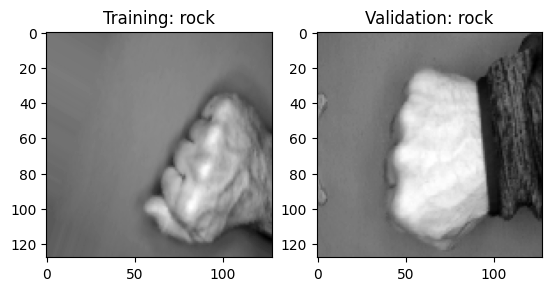

In [5]:
def get_class_name(class_index, generator):
    for class_name, idx in generator.class_indices.items():
        if idx == class_index:
            return class_name
    return None

# Ambil satu batch dari generator pelatihan
train_batch = train_generator.next()

# Ambil satu batch dari generator validasi
val_batch = val_generator.next()

# Plot gambar dari generator pelatihan
plt.subplot(1, 2, 1)
plt.imshow(train_batch[0][0], cmap='gray')
plt.title(f"Training: {get_class_name(np.argmax(train_batch[1][0]), train_generator)}")

# Plot gambar dari generator validasi
plt.subplot(1, 2, 2)
plt.imshow(val_batch[0][0], cmap='gray')
plt.title(f"Validation: {get_class_name(np.argmax(val_batch[1][0]), val_generator)}")

# Tampilkan plot
plt.show()

## Model harus menggunakan model sequential.

In [114]:
model = keras.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)),
  tf.keras.layers.MaxPooling2D(2, 2)
  ,
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
filepath= "model_cnn_rockpaperscissors.h5"
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False
)

history = model.fit(
  train_generator,
  epochs=30,
  steps_per_epoch=train_generator.n // train_generator.batch_size,
  validation_data=val_generator,
  validation_steps=val_generator.n //  val_generator.batch_size,
  callbacks=[checkpoint]
)

In [3]:
load_model = keras.models.load_model("/content/model_cnn_rockpaperscissors.h5")
load_model.evaluate(val_generator)

OSError: ignored

In [4]:
def plot_loss_curves(model, figsize=(16, 5)):
    loss = model.history['loss']
    val_loss = model.history['val_loss']

    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']

    epochs = np.arange(len(loss))

    plt.figure(figsize=figsize)

    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label='accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.legend()

    plt.show()


In [5]:
plot_loss_curves(history)

NameError: ignored

In [ ]:
def load_and_prep_image(filename, img_shape=64):
    """
    membaca sebuah gambar dari nama file, lalu ubah ke dalam tensor dan reshaping ke (img_shape, img_shape, colour_channels).
    """
    # Memuat gambar dengan skala abu-abu
    img = tf.keras.preprocessing.image.load_img(filename, color_mode='grayscale', target_size=(img_shape, img_shape))
    # Mengonversi gambar menjadi tensor float32
    img = tf.keras.preprocessing.image.img_to_array(img)
    # Rescale nilai piksel menjadi dalam rentang [0, 1]
    img = img / 255.0
    # Mengubah dimensi tensor menjadi (img_shape, img_shape, 1) karena ini adalah gambar skala abu-abu
    img = tf.expand_dims(img, axis=0)  # Tambahkan dimensi batch
    return img

In [3]:
from tqdm import tqdm
import glob

def process_and_visualize(src, max_num_hands=1, static_image_mode=True,
                           min_detection_confidence=0.2, min_tracking_confidence=0.2,
                           img_size=128, offset=20):
  try:
    mp_drawing = mp.solutions.drawing_utils
    mp_hands = mp.solutions.hands

    landmark_spec = mp_drawing.DrawingSpec(
        thickness=2,
        circle_radius=3,
        color=(0, 0, 0)
    )
    connection_spec = mp_drawing.DrawingSpec(
        thickness=2,
        circle_radius=3,
        color=(255, 255, 255)
    )

    # Create a hand detector object with parameters
    detector = mp_hands.Hands(
        max_num_hands=max_num_hands,
        static_image_mode=static_image_mode,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence
    )

    output_images = np.copy(src)

    results = detector.process(cv2.cvtColor(output_images, cv2.COLOR_BGR2RGB))
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        # Draw the landmarks and connections on the original frame

        mp.solutions.drawing_utils.draw_landmarks(
            output_images,
            hand_landmarks,
            mp.solutions.hands.HAND_CONNECTIONS,
            landmark_drawing_spec=landmark_spec,
            connection_drawing_spec=connection_spec
        )

        # Create an empty list to store the landmark coordinates
        points = []
        for data_point in hand_landmarks.landmark:
            points.append([data_point.x * output_images.shape[1], data_point.y * output_images.shape[0]])
        x, y, w, h = cv2.boundingRect(np.array(points).astype('float32'))
        # Create a white image with the same size as the cropped image
        img_white = np.ones((img_size, img_size, 3), np.uint8) * 255
        # Crop the original frame with the bounding rectangle and offset
        img_crop = output_images[y - offset:y + h + offset, x - offset:x + w + offset]
        if np.any(img_crop):
            # Resize the cropped image to match the image size
            img_crop = cv2.resize(img_crop, (img_size, img_size))
            # Paste the cropped image onto the white image
            img_white[0:img_size, 0:img_size] = img_crop

    final_result = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
    return final_result
  except Exception as e:
    return output_images

def load_images_through_walk_folders(base_path, extensions):
  images = []
  for extension in extensions:
    for filepath in tqdm(sorted(glob.glob(f"{base_path}**/*{extension.lower()}", recursive=True))):
      image = cv2.imread(filepath)
      result_image = process_and_visualize(image)
      cv2.imwrite(filepath, result_image)
  pass

image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif', '.webp', '.svg', '.exif']
load_images_through_walk_folders('./rockpaperscissors/rps-cv-images/paper/', image_extensions)

0it [00:00, ?it/s]


0it [00:00, ?it/s]
 95%|█████████▌| 677/712 [05:41<00:29,  1.18it/s]

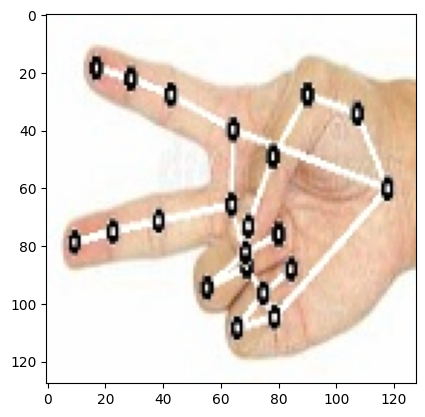

In [143]:
import os

path = '/content/test.jpg'
src = cv2.imread(path)
# result_image = process_and_visualize(src)
# cv2.imwrite('./test.jpg', result_image)

In [ ]:
val_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

1/1 [==============================] - 0s 25ms/step


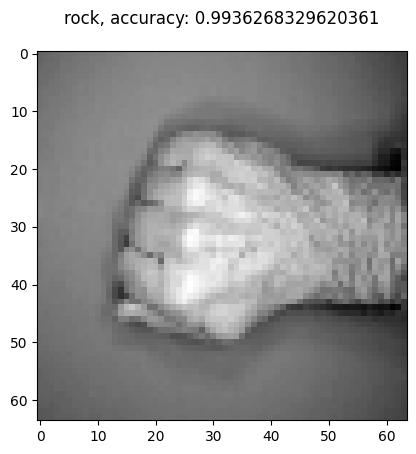

In [ ]:
target_labels = ['paper', 'rock', 'scissors']
img_test = load_and_prep_image('/content/rockpaperscissors/rock/81eTWj04M9fRjy51.png')
y_pred = load_model.predict(img_test)
plt.imshow(img_test[0], cmap='gray')
plt.title(f'{target_labels[np.argmax(y_pred)]}, accuracy: {y_pred[0][np.argmax(y_pred)]}', y=1.05)
plt.show()